In [ ]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hid warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_file)
clinical_data=pd.read_csv(clinical_file)
# Combined the data into a single datasetp

all_data=pd.merge(clinical_data,mouse_data,how='left',on='Mouse ID')
# Displayed the data table for preview

In [2]:
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Stored the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_data=all_data.groupby(['Drug','Timepoint'])
tumor_vol_mean=tumor_data['Tumor Volume (mm3)'].mean()

# Storeed the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_mean_error=tumor_data['Tumor Volume (mm3)'].sem()

# Converted to DataFrame
new_data=pd.DataFrame(tumor_vol_mean).reset_index()
new_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [89]:
# Converted to DataFrame
sem_tumor=pd.DataFrame(stand_mean_error).reset_index()
sem_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [87]:
# Minor Data Munging to Re-Format the Data Frames
re_formated=new_data.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
re_formated.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [64]:
#gave different drugs variables
drug_one=re_formated['Capomulin']
drug_two=re_formated['Infubinol']
drug_three=re_formated['Ketapril']
drug_four=re_formated['Placebo']
drug_all=re_formated[['Capomulin','Infubinol','Ketapril','Placebo']]
index_vals=re_formated.index
index_vals

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [46]:
drug_all.shape
timepoint.shape

(100,)

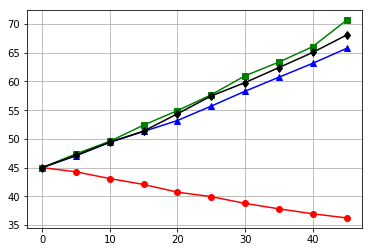

In [335]:

# Generated the Plot (with Error Bars)
timepoint=new_data['Timepoint']
t_volume=new_data['Tumor Volume (mm3)']

table_one=plt.plot(index_vals,drug_one,color='red',marker='o')
table_one=plt.plot(index_vals,drug_two,color='blue',marker='^')
table_one=plt.plot(index_vals,drug_three,color='green',marker='s')
table_one=plt.plot(index_vals,drug_four,color='black',marker='d')
plt.show
plt.grid()

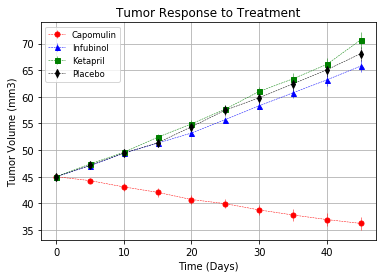

In [5]:
#  Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Stored the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_data=all_data.groupby(['Drug','Timepoint'])
mean_met=grouped_data['Metastatic Sites'].mean()
# converted to DataFrame
mean_met=pd.DataFrame(mean_met)
mean_met.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [94]:
#reset index to timepoint
reset_mean_met=mean_met.reset_index()
pivot_met=reset_mean_met.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
pivot_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [9]:
# Stored the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error=grouped_data["Metastatic Sites"].sem()
met_error=pd.DataFrame(met_error)
met_error.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
re_formated.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


<function matplotlib.pyplot.show(*args, **kw)>

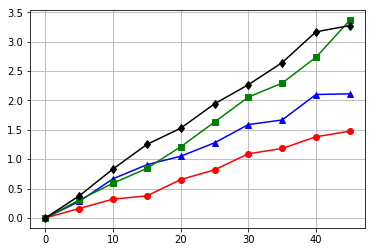

In [334]:
# Generated the Plot (with Error Bars)
drug_one_met=pivot_met['Capomulin']
drug_two_met=pivot_met['Infubinol']
drug_three_met=pivot_met['Ketapril']
drug_four_met=pivot_met['Placebo']
index_vals_met=pivot_met.index

plot_one=plt.plot(index_vals,drug_one_met,color='red',marker='o')
plot_two=plt.plot(index_vals,drug_two_met,color='blue',marker='^')
plot_three=plt.plot(index_vals,drug_three_met,color='green',marker='s')
plot_four=plt.plot(index_vals,drug_four_met,color='black',marker='d')
# Save the Figure
plt.grid()
plt.show
# Show the Figure


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count=all_data.groupby(['Drug','Timepoint'])
mice_count=mice_count['Mouse ID'].count()
mice_count=mice_count.reset_index()
mice_count=mice_count.rename(columns={'Mouse ID':'Mouse Count'})
mice_count.head()





,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [104]:
# Minor Data Munging to Re-Format the Data Frames
re_formated_two=mice_count.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
re_formated_two.head(100)
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


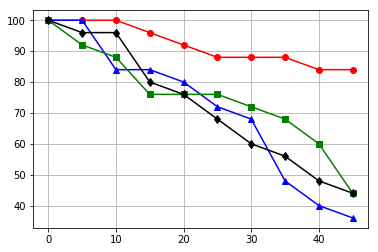

In [333]:
# Generated the Plot (Accounting for percentages)
graph_one=plt.plot(index_vals_met,percentages,color='red',marker='o')
graph_one=plt.plot(index_vals_met,percentages_two,color='blue',marker='^')
graph_one=plt.plot(index_vals_met,percentages_three,color='green',marker='s')
graph_one=plt.plot(index_vals_met,percentages_four,color='black',marker='d')
# Saved the Figure
pd.DataFrame(percentages)
# Figure
plt.grid()